<a href="https://colab.research.google.com/github/nnilayy/Classification-Notebook/blob/main/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
!pip install --upgrade imbalanced-learn
!pip install --upgrade scikit-learn

In [13]:
!git clone https://github.com/balvisio/imbalanced-learn
# %cd imbalanced-learn
# !pip install .

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: could not create work tree dir 'imbalanced-learn': No such file or directory


In [10]:
%rm -rf '/content/imbalanced-learn'

In [9]:
from imblearn.over_sampling import BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, MLSMOTE


ImportError: ignored

In [6]:
!pwd

/content/imbalanced-learn


In [ ]:
# TO REMOVE WARNINGS USE THIS

import warnings
warnings.filterwarnings("ignore")

# OR USE THIS

# import warnings
# def fxn():
#     warnings.warn("deprecated", DeprecationWarning)

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     fxn()

In [ ]:
df=pd.read_csv('/content/winequality.csv')

ANALYSIS PORTION

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
# To get the idea of the Feature Samples(number of rows) and Feature Columns(number of columns)
df.shape

(1143, 13)

In [ ]:
# To check the number of classes in Y columns
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

   quality
5      483
6      462
7      143
4       33
8       16
3        6


The Count Plot for the same column is as follows: 



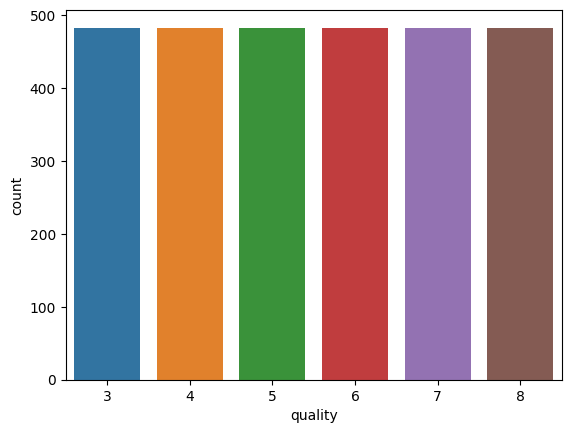

In [ ]:
# To check if the classes are balanced or not
print(pd.DataFrame(df["quality"].value_counts()))
print("\n")
print("The Count Plot for the same column is as follows: \n")
sns.countplot(x=y_res);

In [ ]:
# To check for duplicate values in the DataFrame
# The Following returns the number of samples which are duplicates
# df.duplicated().value_counts()

# This displays all the samples which are duplicated
# df[df.duplicated()]

# This displays all the unique samples
# df[~df.duplicated()]

# This removes all the duplicated samples
df=df[~df.duplicated()]
df = df.reset_index()
df["type"]=pd.get_dummies(df["type"],drop_first=True)
df=df.drop(["index"], axis=1)
df

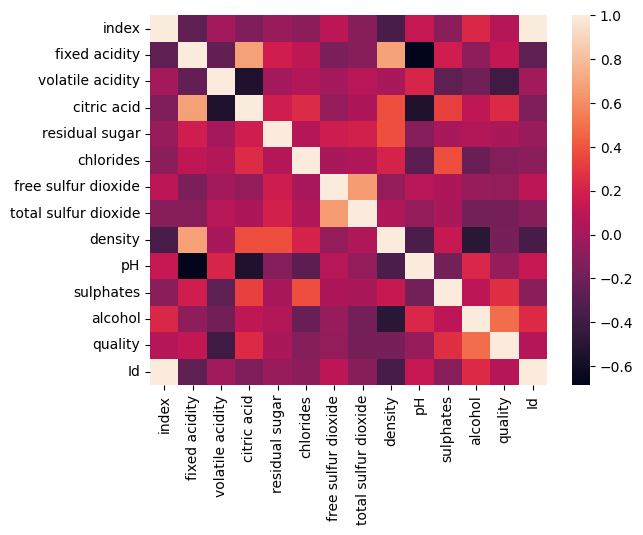

In [ ]:
# To get the HeatMap for the DataFrame
sns.heatmap(df.corr());
# Put "annot=True" to get the correlation value in each box
#sns.heatmap(df.corr(),annot=True);

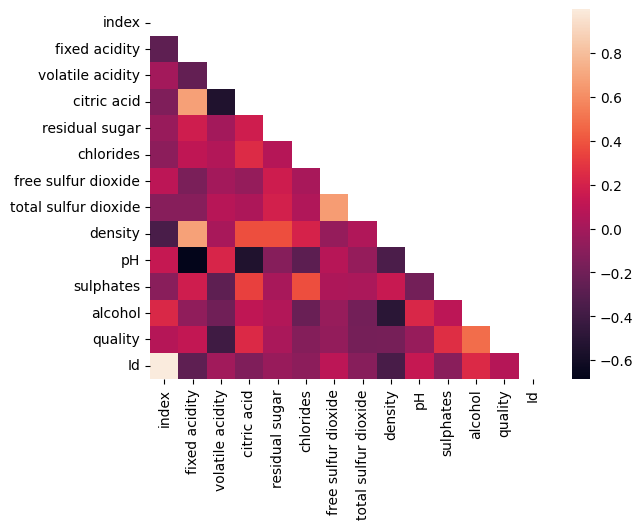

In [ ]:
# To get the bottom Non-Repeating half of the HeatMap
corr= df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask=matrix);

## Handling Missing Values

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
df

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


## SPLITTING DATA INTO TRAIN AND TEST


In [ ]:
X=df.drop(['quality'],axis=1)
y=df['quality']

In [ ]:
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import ADASYN, SMOTE
sme = SMOTE(k_neighbors=3)
X_res, y_res = sme.fit_resample(X, y)
# smt = SMOTETomek()
# X_res, y_res = smt.fit_resample(X, y)
# ada = ADASYN(n_neighbors=1,random_state=42)
# X_res, y_res = ada.fit_resample(X, y)


In [ ]:
# OverSampling To create artificially more samples of a class in a column
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
# from imblearn.over_sampling import ADASYN
os=SMOTE(k_neighbors=1)
# ada = ADASYN(sampling_strategy='minority', n_neighbors=9)
# X_res, y_res = ada.fit_resample(X, y)

os=BorderlineSMOTE(k_neighbors=1)
X_res,y_res=os.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=101)

## Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.semi_supervised import LabelPropagation
from catboost import CatBoostClassifier

# GaussianProcessClassifier takes the longest time
from lightgbm import LGBMClassifier

# LGBMClassifier(objective='multiclass', random_state=5)
models=[
    ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier,
    BaggingClassifier, GradientBoostingClassifier, XGBClassifier
    ,DecisionTreeClassifier, SVC,
    MLPClassifier, LinearSVC, KNeighborsClassifier,
    RidgeClassifier, LogisticRegression, LinearDiscriminantAnalysis,
    AdaBoostClassifier, QuadraticDiscriminantAnalysis, GaussianNB,
    SGDClassifier, LabelPropagation,LGBMClassifier,CatBoostClassifier
]

accuracy = []
for model in models:
  m=model()
  m.fit(X_train,y_train)
  y_test_pred = m.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_test_pred)*100)
  print('------------------------------------------------------------------------------------------------------------')
  print('------------------------------------------------------------------------------------------------------------')
  print(model.__name__)
  print( (y_test, y_test_pred))
# Extracting the model name from the models
model_names=[]
for model in models:
  model_names.append(model.__name__)

# Combining the Model Name and Accuracy in a dataframe
# Here Model_Names and Accuracy Both are lists
# acc=pd.DataFrame(list(zip(model_names,accuracy)),columns=['Name','Accuracy'])
acc=pd.DataFrame({'Name':model_names, 'Accuracy':accuracy})

# Arranging the dataframe by the models with the highest accuracy to lowest accuracy
acc=acc.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
acc.index = acc.index + 1
acc

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
ExtraTreesClassifier
(2507    8
360     6
147     5
730     6
2092    7
       ..
185     4
2734    8
1105    5
467     7
1971    4
Name: quality, Length: 870, dtype: int64, array([8, 5, 5, 6, 6, 8, 7, 7, 7, 6, 8, 4, 6, 3, 4, 3, 6, 7, 3, 4, 8, 6,
       4, 8, 7, 6, 4, 4, 5, 3, 6, 7, 3, 5, 8, 6, 5, 6, 5, 6, 5, 5, 8, 3,
       7, 3, 5, 8, 8, 8, 4, 5, 8, 3, 5, 5, 8, 4, 7, 7, 4, 5, 7, 5, 7, 3,
       8, 4, 4, 6, 7, 6, 3, 8, 7, 8, 4, 5, 5, 5, 5, 3, 8, 5, 8, 3, 7, 3,
       4, 7, 6, 3, 7, 8, 4, 7, 7, 8, 5, 4, 8, 5, 6, 5, 7, 8, 3, 5, 4, 6,
       5, 6, 6, 4, 5, 3, 5, 4, 6, 6, 4, 7, 8, 5, 6, 3, 3, 4, 3, 8, 6, 6,
       5, 3, 3, 8, 8, 3, 7, 5, 7, 7, 4, 3, 4, 3, 3, 4, 5, 7, 6, 6, 6, 8,
       4, 6, 8, 8, 3, 3, 5, 8, 4, 5, 5, 4, 4, 5, 8, 7, 4, 6, 3, 3, 8, 7,
       4, 5, 6, 6, 4, 7,

ValueError: ignored

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 3,shuffle=True,random_state = 42)
model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            sampling_strategy='auto',
                            replacement=False,
                            random_state=0,max_features=1.0)
model.fit(X_train, y_train)

results = sklearn.model_selection.cross_val_score(model, X, y, cv = kfold)
print("accuracy :")
print(results.mean())

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier())
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
accuracy_score(y_test, y_test_pred)*100

83.9080459770115

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
model = EasyEnsembleClassifier()
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
accuracy_score(y_test, y_test_pred)*100

38.85057471264368

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy'
                                , n_estimators = 100)

forest.fit(X_train, y_train)
y_test_pred = forest.predict(X_test)
accuracy_score(y_test, y_test_pred)*100

85.63218390804597

In [ ]:
m=CatBoostClassifier()
m.fit(X_train,y_train)
y_test_pred = m.predict(X_test)
accuracy.append(accuracy_score(y_test, y_test_pred)*100)
print('------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------')
# print(m.__name__)
print(classification_report(y_test, y_test_pred))


Learning rate set to 0.082032
0:	learn: 1.6819768	total: 61.3ms	remaining: 1m 1s
1:	learn: 1.6003066	total: 87.9ms	remaining: 43.9s
2:	learn: 1.5307358	total: 107ms	remaining: 35.7s
3:	learn: 1.4733742	total: 137ms	remaining: 34.2s
4:	learn: 1.4178223	total: 165ms	remaining: 32.9s
5:	learn: 1.3657169	total: 212ms	remaining: 35.1s
6:	learn: 1.3178025	total: 245ms	remaining: 34.8s
7:	learn: 1.2742459	total: 271ms	remaining: 33.6s
8:	learn: 1.2363808	total: 304ms	remaining: 33.5s
9:	learn: 1.1982148	total: 340ms	remaining: 33.6s
10:	learn: 1.1671301	total: 381ms	remaining: 34.2s
11:	learn: 1.1373274	total: 425ms	remaining: 35s
12:	learn: 1.1100484	total: 460ms	remaining: 34.9s
13:	learn: 1.0838686	total: 479ms	remaining: 33.8s
14:	learn: 1.0627942	total: 499ms	remaining: 32.8s
15:	learn: 1.0372392	total: 519ms	remaining: 31.9s
16:	learn: 1.0197307	total: 536ms	remaining: 31s
17:	learn: 0.9980601	total: 563ms	remaining: 30.7s
18:	learn: 0.9811605	total: 602ms	remaining: 31.1s
19:	learn: 0.

In [ ]:
# Plotting the Accuracy of Different Models
fig=plt.figure(figsize=(20,30))
fig.set_size_inches(40,40)
acc.plot(kind ='bar',x="Name",y='Accuracy')
plt.xlabel('Model Name')
plt.ylabel('Accuray Percentage %')
plt.xticks(rotation=82);
plt.show()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
# kbinage=KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="kmeans")
# trf=ColumnTransformer([
#     ("first",k_bin),
#     ()
# ])
from sklearn.preprocessing import KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df["chlorides"]= kbd.fit_transform(pd.DataFrame(df["chlorides"]))
df["chlorides"].value_counts()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df["alcohol"]= kbd.fit_transform(pd.DataFrame(df["alcohol"]))
df["alcohol"].value_counts()

In [ ]:
df[""].value_counts()

In [ ]:
df

In [ ]:
df["free sulfur dioxide"].unique()

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# mae = mean_absolute_error(y_test, y_test_pred)
# mse = mean_squ ared_error(y_test, y_test_pred)
# rmse = np.sqrt(mse)


In [ ]:
# df["citric acid"].unique()
pH=df["free sulfur dioxide"].unique()
pH.sort()
len(pH)
# x=df["citric acid"].unique()
# x.sort()
# x

In [ ]:
# PAIR PLOT

# fig=plt.figure(figsize=(20,30))
# fig.set_size_inches(8,8)
# plt.style.use('seaborn-darkgrid')
# sns.pairplot(df, hue='quality')

In [ ]:
# df.columns
# df.columns.values
# df.columns.values.tolist()
# pd.DataFrame(df.columns)

In [ ]:
# Converting Numeric Column with repeating value to string to get a scatter plot
# plt.scatter(df['Year'].astype(str),y)
# print(sns.scatterplot(x=df['State_Name'],y=y))
# plt.figure(figsize=(15,10),dpi=300)
# plt.xticks(rotation=90)
# plt.line(x=df['sulphates'],y=df['quality'])
# plt.scatter(x=df['chlorides'],y=df['quality'])
# sns.lineplot(x=df['sulphates'],y=df['quality'])
# plt.show()

In [ ]:
# df['quality'].unique()
# df.corr()

# # Returns the columns with just numeric columns
# df.select_dtypes(include=['number'])
# g=sns.PairGrid(df)
# g.map(plt.scatter)
# # Balanced Dataset or not

In [ ]:
# Plotting the Accuracy of Different Models
# fig=plt.figure(figsize=(20,30))
# fig.set_size_inches(40,40)
# acc.plot(kind ='bar',x="Name",y='Accuracy')
# plt.xlabel('Model Name')
# plt.ylabel('Accuray Percentage %')
# plt.xticks(rotation=82);
# plt.show()

In [ ]:
# df.info()
# df['quality'].plot(kind='kde')
# fig = plt.gcf()
# fig.set_size_inches(15, 10)
# df=df[df['total sulfur dioxide']<155]
# sns.scatterplot(x=df['total sulfur dioxide'],y=df['quality'],c=df['quality'],alpha=0.5)
# plt.legend()

In [ ]:
# How to Drop Multiple rows
# Find the rows,
# Save them,
# Drop them using their index
# dr=df[(df['total sulfur dioxide']>100) & (df['quality']==4)]
# df=df.drop(dr.index,axis=0)

In [ ]:
# plt.style.use('seaborn-whitegrid')
# plt.style.use('dark_background')
# _, axes = plt.subplots(4, 3, figsize=(25,25))
# for (((x,y),value), column) in zip(np.ndenumerate(axes),columns):
#   sns.boxplot(y=df[column], x=df['quality'],ax=axes[x][y])

In [ ]:
# def get_redundant_pairs(df):
#     '''Get diagonal and lower triangular pairs of correlation matrix'''
#     pairs_to_drop = set()
#     cols = df.columns
#     for i in range(0, df.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# def get_top_abs_correlations(df, n=5):
#     au_corr = df.corr().abs().unstack()
#     labels_to_drop = get_redundant_pairs(df)
#     au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
#     return au_corr[0:n]

# print("Top Absolute Correlations")
# pd.DataFrame(get_top_abs_correlations(df, 10))

In [ ]:
# sns.scatterplot
# sns.pairplot
# sns.barplot
# sns.boxplot
# sns.countplot

In [ ]:
# column=df['quality']
# q3=column.quantile(0.75)
# q1=column.quantile(0.25)
# iqr=q3-q1
# lb=q1-1*iqr
# ub=q3+1*iqr
# filter = (column>=lb) & (column<=ub)
# df=df[filter]
# sns.boxplot(y=column)
# plt.show()

In [ ]:
# columns=df.columns
# plt.style.use('seaborn-darkgrid')
# _, axes = plt.subplots(4, 3, figsize=(25,25))
# for (((x,y),value), column) in zip(np.ndenumerate(axes),columns):
#   sns.boxplot(data=df,y=df[column], x=df['quality'], ax=axes[x][y])

In [ ]:
# Look for Categorgical Columns

In [ ]:
df.info()

In [ ]:
df.describe()
df.describe().T

In [ ]:
df.dtypes

In [ ]:
pd.DataFrame(df.columns)

In [ ]:
df.set_index()

In [ ]:
# Odd that even after removing the duplicated values the accurac dropped
# A speculation that i have is that some of the dupliated values got split into the train and test samples

## GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC, NuSVC
model=SVC()
param_grid={
    'C':[1,5,10,20],
    "kernel":['linear','poly','rbf','sigmoid'],
}

classifier=GridSearchCV(model,param_grid,cv=5,n_jobs=-1)
classifier.fit(X,y)
gscv=pd.DataFrame(classifier.cv_results_)
gscv_imp=gscv[['param_C','param_kernel','meam_test_score']]

best_parameters=classifier.best_params_
highest_accuracy=classifier.best_score_

In [ ]:
kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
degree: [1,5,10,15]
gamma: {‘scale’, ‘auto’}
shrinking:{True, False}
class_weight:{N             one, 'balanced'}
decision_function_shape:{‘ovo’, ‘ovr’}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model=SVC()
param_grid={
    "kernel":['linear','poly','rbf','sigmoid'],
    'C':[1,5,10,20]
}
classifier=GridSearchCV(model,param_grid,cv=5)
classifier.fit(X,y)
gscv=pd.DataFrame(classifier.cv_results_)
gscv_imp=gscv[['param_C','param_kernel','meam_test_score']]

best_parameters=classifier.best_params_
highest_accuracy=classifier.best_score_

In [ ]:
# https://www.youtube.com/watch?v=4Im0CT43QxY

# Model Stacking
# https://www.youtube.com/watch?v=0BGLfYY26zQ